In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import pickle

In [69]:
data = pd.read_csv("housing.csv")
data 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [70]:
#Exploring data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [71]:
#So we have mostly non-null data. Just few null data in total_bedrooms section, so we clear these out.
# We get rid of NAN: Not a number data 
data.dropna(inplace= True) #inplace just replaces the data
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [72]:
from sklearn.model_selection import train_test_split

In [73]:
# Now we decide what X, Y is and then portion of split for training data
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=X['ocean_proximity'])

We made sure to include data evenly regarding ocean_proximity to both test and train data, else later while one-hot-encoding the feature sizes will be different and the model can't be tested.

Now we combine just the training data and see what it looks like, what info we can get from it etc.

In [74]:
train_data = X_train.join(y_train)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
1290,-121.79,38.00,34.0,3090.0,593.0,1588.0,566.0,3.6118,INLAND,124700.0
16230,-121.33,37.97,36.0,1953.0,492.0,999.0,371.0,2.0043,INLAND,90800.0
13535,-117.32,34.16,9.0,711.0,139.0,316.0,152.0,4.0156,INLAND,131000.0
933,-122.05,37.55,23.0,4247.0,835.0,2357.0,823.0,5.1321,NEAR BAY,211300.0
2517,-122.16,39.78,32.0,1288.0,221.0,562.0,203.0,2.3250,INLAND,69600.0
...,...,...,...,...,...,...,...,...,...,...
17226,-119.73,34.45,44.0,2261.0,328.0,763.0,294.0,6.7449,<1H OCEAN,415600.0
11169,-117.98,33.83,17.0,3419.0,932.0,2460.0,766.0,3.2823,<1H OCEAN,228500.0
1723,-122.36,37.96,31.0,1157.0,276.0,956.0,232.0,1.5347,NEAR BAY,80400.0
17104,-122.23,37.45,29.0,1617.0,235.0,758.0,246.0,7.7932,NEAR OCEAN,469900.0


Now some basic data exploration follows.

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

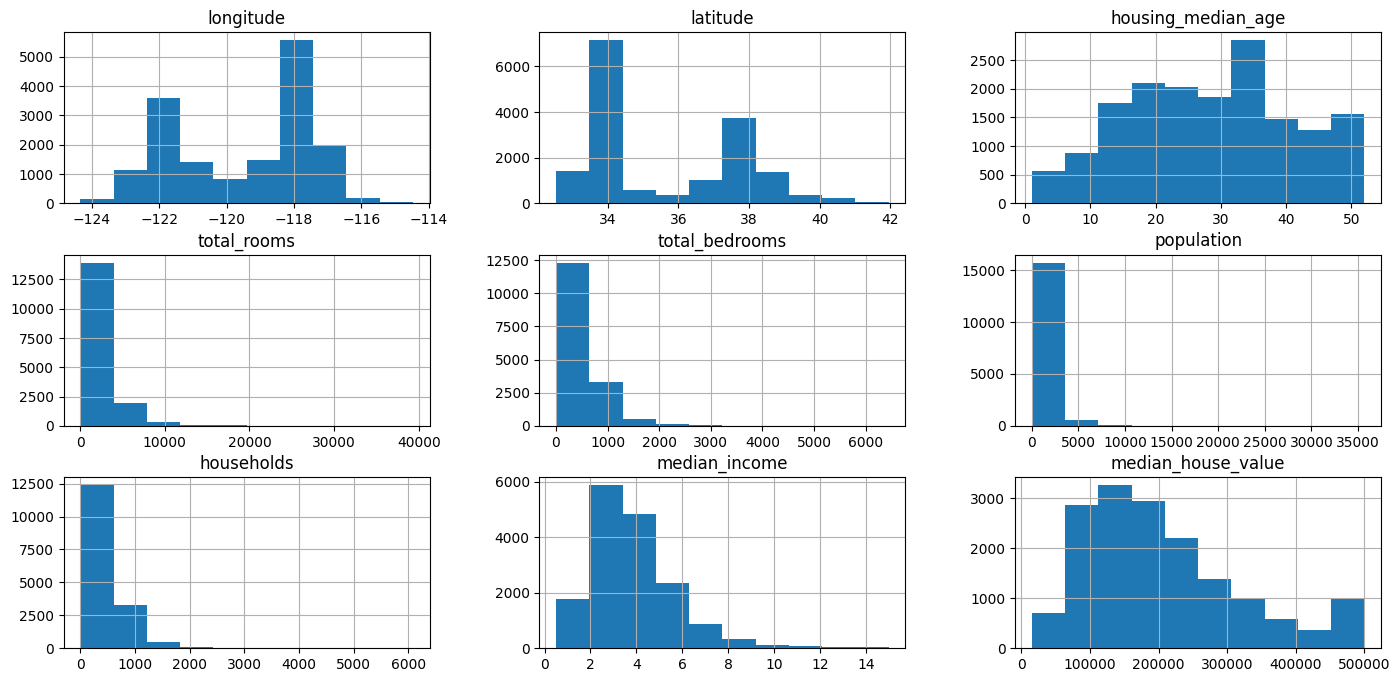

In [75]:
train_data.hist(figsize=(17,8))

<Axes: >

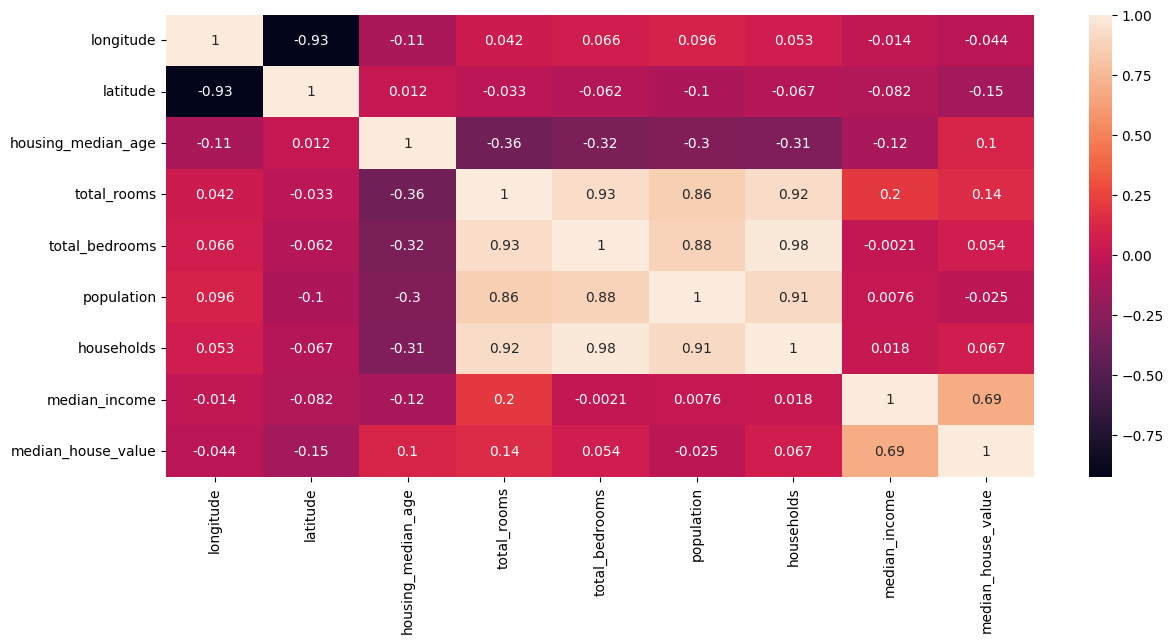

In [76]:
plt.figure(figsize=(14,6))
sns.heatmap(train_data.corr(numeric_only=True), annot=True) #, cmap="YlGnBu"

With the histogram plots, you can see that about 4 of them are heavily skewed. So we take the log of those features. In order to avoid log(0), we add a +1 to the logarithm.

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

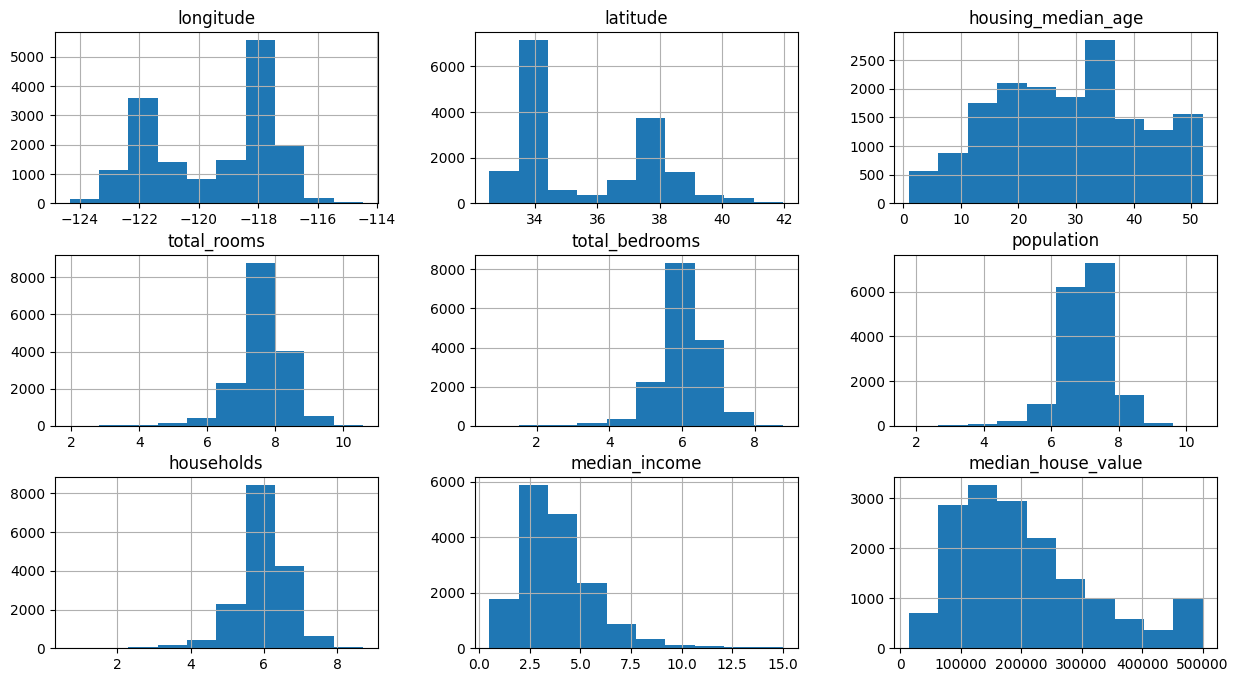

In [77]:
train_data['households'] = np.log(train_data['households'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data.hist(figsize=(15, 8))

Now we are going to look at the ocean_proximity feature and see what it's about.

In [78]:
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7227
INLAND        5197
NEAR OCEAN    2102
NEAR BAY      1816
ISLAND           4
Name: count, dtype: int64

So the above shows that there are 5 variables that we get derive from these by one-hop-encoding. ie binary values that indicate yes or no for these 5 variables.

In [79]:
temp = pd.get_dummies(train_data.ocean_proximity, dtype=int)
temp

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
1290,0,1,0,0,0
16230,0,1,0,0,0
13535,0,1,0,0,0
933,0,0,0,1,0
2517,0,1,0,0,0
...,...,...,...,...,...
17226,1,0,0,0,0
11169,1,0,0,0,0
1723,0,0,0,1,0
17104,0,0,0,0,1


In [80]:
train_data = train_data.join(temp)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
1290,-121.79,38.00,34.0,8.036250,6.386879,7.370860,6.340359,3.6118,INLAND,124700.0,0,1,0,0,0
16230,-121.33,37.97,36.0,7.577634,6.200509,6.907755,5.918894,2.0043,INLAND,90800.0,0,1,0,0,0
13535,-117.32,34.16,9.0,6.568078,4.941642,5.758902,5.030438,4.0156,INLAND,131000.0,0,1,0,0,0
933,-122.05,37.55,23.0,8.354204,6.728629,7.765569,6.714171,5.1321,NEAR BAY,211300.0,0,0,0,1,0
2517,-122.16,39.78,32.0,7.161622,5.402677,6.333280,5.318120,2.3250,INLAND,69600.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17226,-119.73,34.45,44.0,7.724005,5.796058,6.638568,5.686975,6.7449,<1H OCEAN,415600.0,1,0,0,0,0
11169,-117.98,33.83,17.0,8.137396,6.838405,7.808323,6.642487,3.2823,<1H OCEAN,228500.0,1,0,0,0,0
1723,-122.36,37.96,31.0,7.054450,5.624018,6.863803,5.451038,1.5347,NEAR BAY,80400.0,0,0,0,1,0
17104,-122.23,37.45,29.0,7.388946,5.463832,6.632002,5.509388,7.7932,NEAR OCEAN,469900.0,0,0,0,0,1


In [81]:
train_data.drop(columns='ocean_proximity')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
1290,-121.79,38.00,34.0,8.036250,6.386879,7.370860,6.340359,3.6118,124700.0,0,1,0,0,0
16230,-121.33,37.97,36.0,7.577634,6.200509,6.907755,5.918894,2.0043,90800.0,0,1,0,0,0
13535,-117.32,34.16,9.0,6.568078,4.941642,5.758902,5.030438,4.0156,131000.0,0,1,0,0,0
933,-122.05,37.55,23.0,8.354204,6.728629,7.765569,6.714171,5.1321,211300.0,0,0,0,1,0
2517,-122.16,39.78,32.0,7.161622,5.402677,6.333280,5.318120,2.3250,69600.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17226,-119.73,34.45,44.0,7.724005,5.796058,6.638568,5.686975,6.7449,415600.0,1,0,0,0,0
11169,-117.98,33.83,17.0,8.137396,6.838405,7.808323,6.642487,3.2823,228500.0,1,0,0,0,0
1723,-122.36,37.96,31.0,7.054450,5.624018,6.863803,5.451038,1.5347,80400.0,0,0,0,1,0
17104,-122.23,37.45,29.0,7.388946,5.463832,6.632002,5.509388,7.7932,469900.0,0,0,0,0,1


<Axes: >

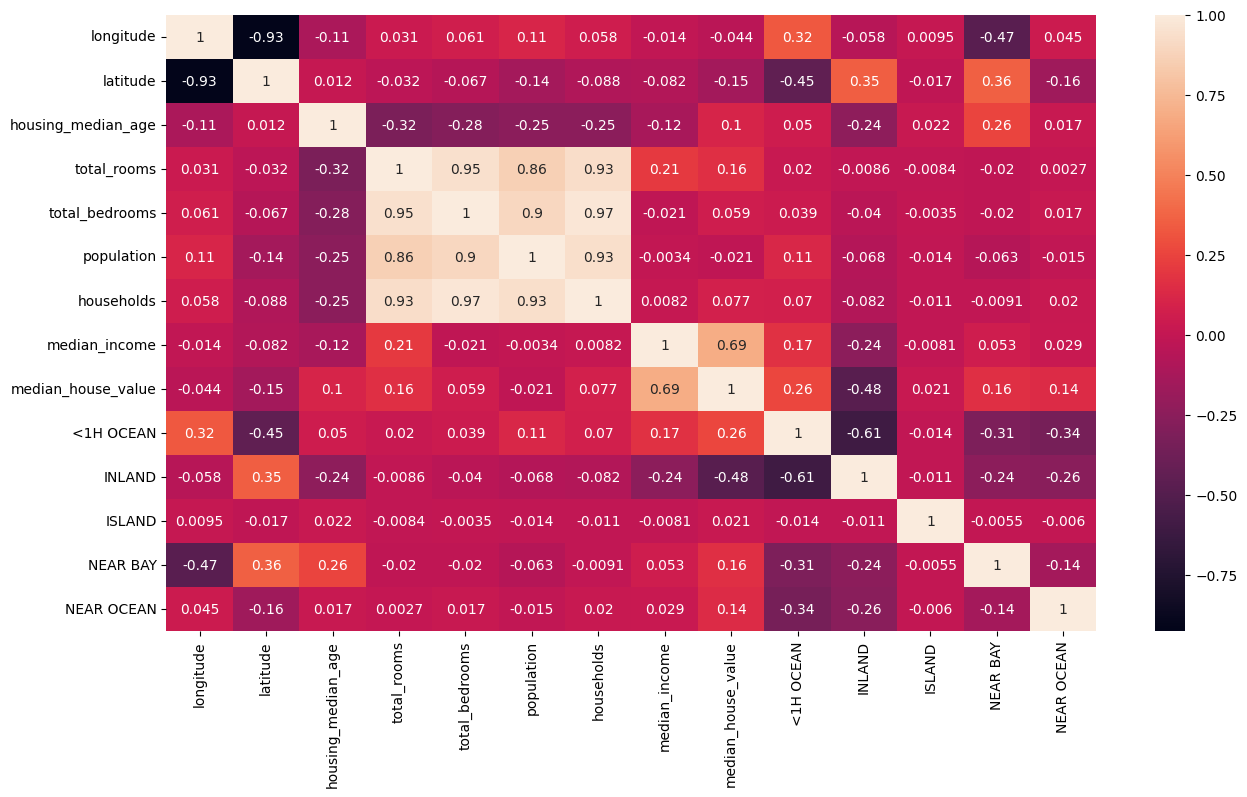

In [82]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True)

To visualize how the housing prices are affected, you can use the latitude longitude info as below.

<Axes: xlabel='latitude', ylabel='longitude'>

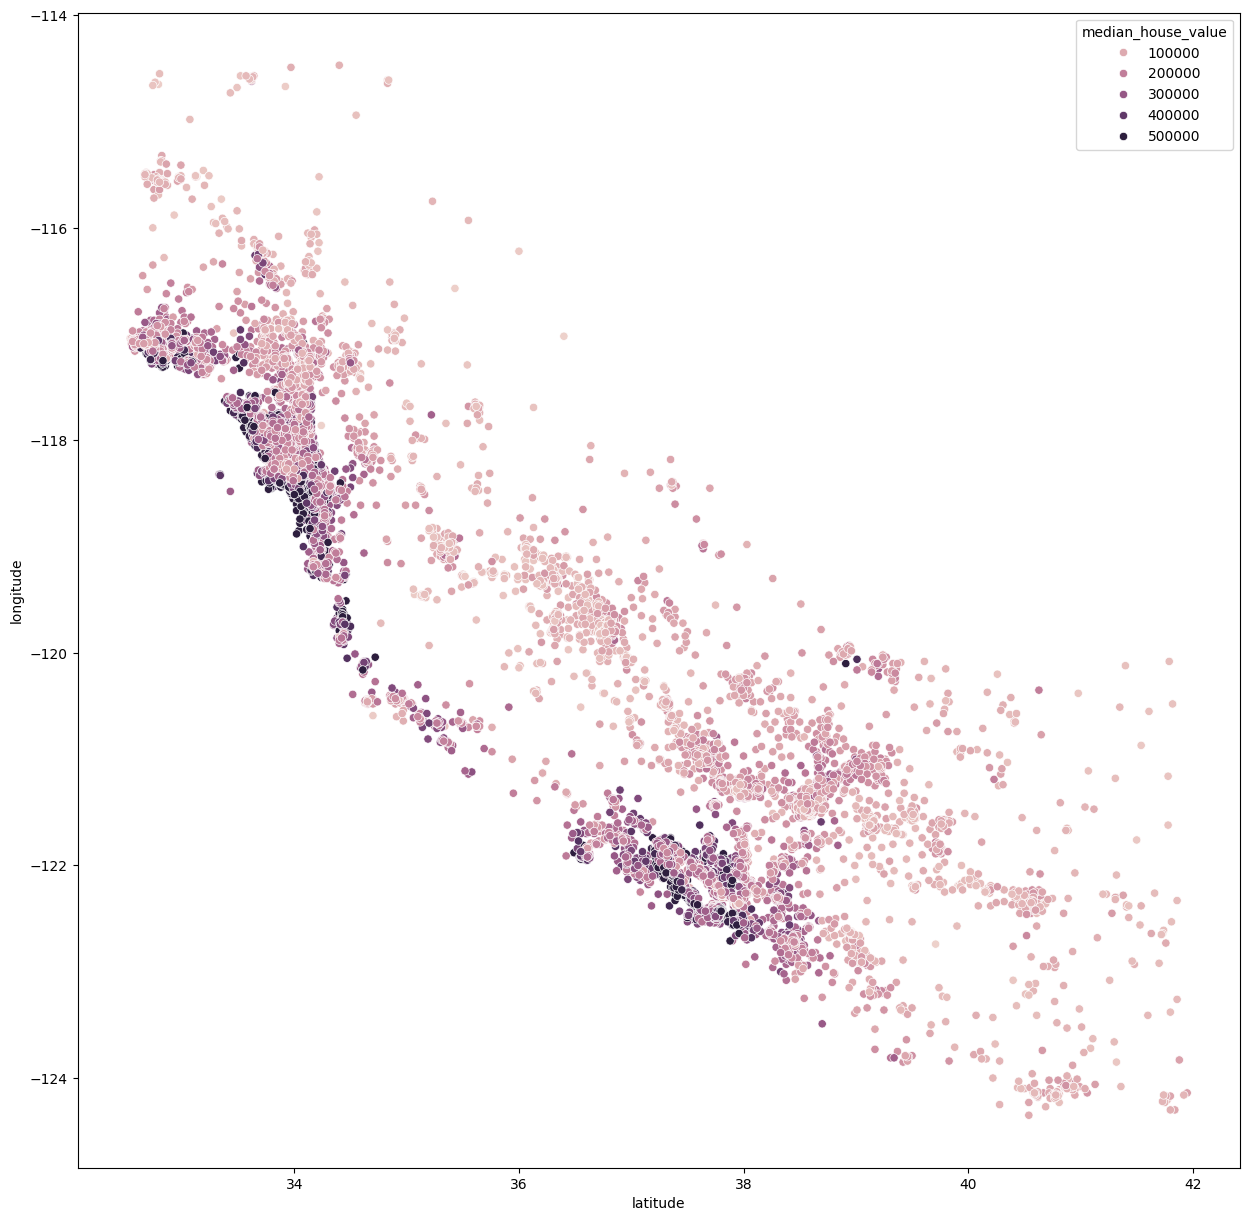

In [83]:
plt.figure(figsize=(15,15))
sns.scatterplot(data=train_data, x="latitude", y="longitude", hue="median_house_value")

Feature Engineering:
1. We introduce "bedroom to total rooms" ratio as more meaningful than one of them.
2. We introduce "rooms per household" ie total rooms / total households.

<Axes: >

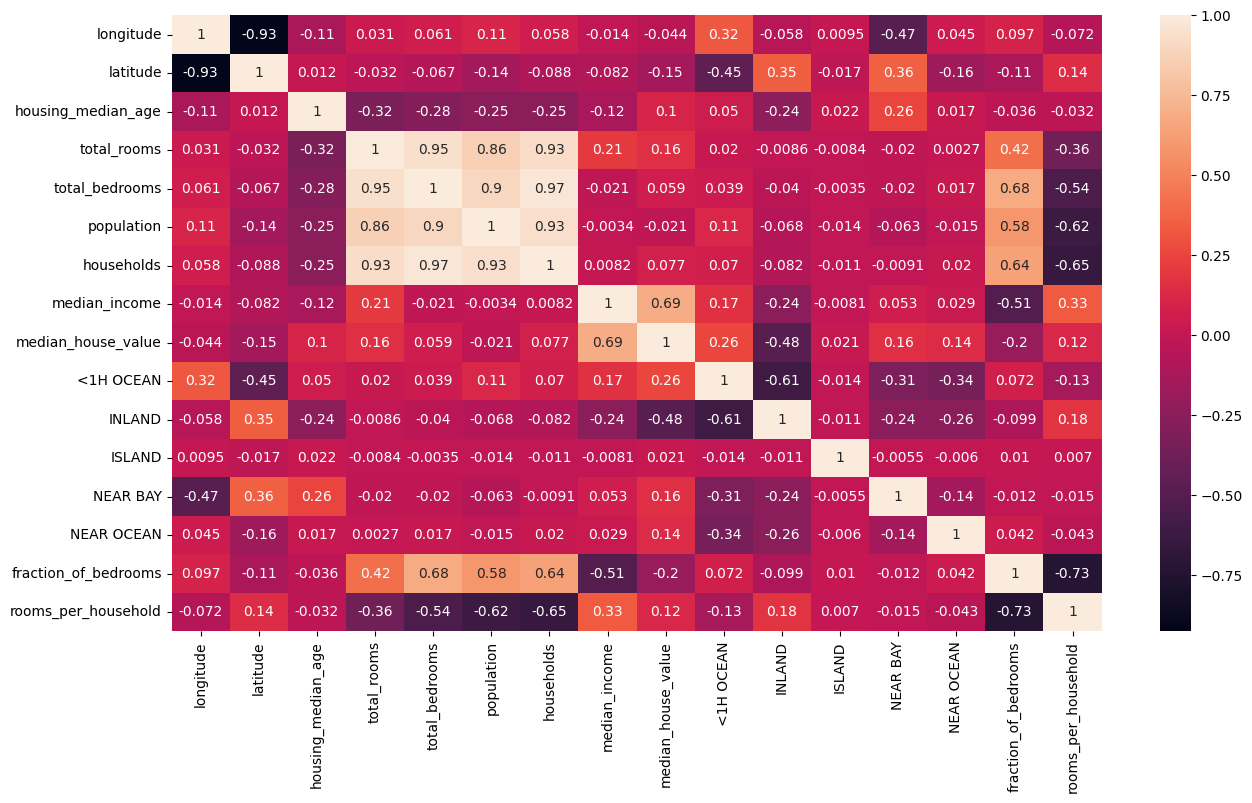

In [84]:
train_data['fraction_of_bedrooms'] = train_data['total_bedrooms']/train_data['total_rooms']
train_data['rooms_per_household'] = train_data['total_rooms']/train_data['households']

plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True)

What's interesting to see above is that the correlation between the two new features seems stronger than the correlation between the individual features. Which means that it might be more meaningul to have these new features instead of both the older ones respectively.

LINEAR REGRESSION MODEL

In [85]:
from sklearn.linear_model import LinearRegression

X_train = train_data.drop(columns=['median_house_value', 'ocean_proximity']) #To reflect the new features that we added after the previous split.
model_reg = LinearRegression()
model_reg.fit(X_train, y_train)

LinearRegression()

Now we need to make similar changes in features to the test data like we did on the training data.

In [86]:
test_data = X_test.join(y_test)
test_data['households'] = np.log(test_data['households'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)

temp = pd.get_dummies(test_data.ocean_proximity, dtype=int)
test_data = test_data.join(temp)

test_data['fraction_of_bedrooms'] = test_data['total_bedrooms']/test_data['total_rooms']
test_data['rooms_per_household'] = test_data['total_rooms']/test_data['households']
test_data, train_data = test_data.drop(columns=['ocean_proximity']), train_data.drop(columns=['ocean_proximity'])

In [87]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,fraction_of_bedrooms,rooms_per_household
1290,-121.79,38.00,34.0,8.036250,6.386879,7.370860,6.340359,3.6118,124700.0,0,1,0,0,0,0.794759,1.267475
16230,-121.33,37.97,36.0,7.577634,6.200509,6.907755,5.918894,2.0043,90800.0,0,1,0,0,0,0.818265,1.280245
13535,-117.32,34.16,9.0,6.568078,4.941642,5.758902,5.030438,4.0156,131000.0,0,1,0,0,0,0.752373,1.305667
933,-122.05,37.55,23.0,8.354204,6.728629,7.765569,6.714171,5.1321,211300.0,0,0,0,1,0,0.805418,1.244264
2517,-122.16,39.78,32.0,7.161622,5.402677,6.333280,5.318120,2.3250,69600.0,0,1,0,0,0,0.754393,1.346645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17226,-119.73,34.45,44.0,7.724005,5.796058,6.638568,5.686975,6.7449,415600.0,1,0,0,0,0,0.750395,1.358192
11169,-117.98,33.83,17.0,8.137396,6.838405,7.808323,6.642487,3.2823,228500.0,1,0,0,0,0,0.840368,1.225053
1723,-122.36,37.96,31.0,7.054450,5.624018,6.863803,5.451038,1.5347,80400.0,0,0,0,1,0,0.797230,1.294148
17104,-122.23,37.45,29.0,7.388946,5.463832,6.632002,5.509388,7.7932,469900.0,0,0,0,0,1,0.739460,1.341155


In [88]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,fraction_of_bedrooms,rooms_per_household
13673,-117.25,34.04,18.0,8.659040,6.969791,7.924434,6.965080,4.4472,161100.0,0,1,0,0,0,0.804915,1.243207
13362,-117.61,34.02,8.0,4.158883,2.302585,3.258097,2.079442,7.7197,275000.0,0,1,0,0,0,0.553655,2.000000
12704,-121.41,38.58,18.0,8.847360,7.540622,7.938802,7.462215,3.0890,141400.0,0,1,0,0,0,0.852302,1.185621
14782,-117.09,32.57,17.0,6.098074,4.430817,5.880533,4.477337,5.1478,138900.0,0,0,0,0,1,0.726593,1.361987
13422,-117.46,34.04,3.0,9.462732,7.747597,8.669227,7.473069,4.2429,147300.0,0,1,0,0,0,0.818748,1.266244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1709,-122.32,37.95,36.0,7.262629,5.505332,6.352629,5.480639,4.3500,185000.0,0,0,0,1,0,0.758036,1.325143
6166,-117.93,34.09,34.0,7.693026,6.068426,7.227662,6.061457,3.9861,163900.0,1,0,0,0,0,0.788822,1.269171
2756,-115.50,32.68,18.0,8.197539,6.817831,8.179200,6.829794,1.5931,88400.0,0,1,0,0,0,0.831692,1.200262
12187,-117.31,33.67,9.0,6.889591,5.135798,6.391917,5.056246,3.1832,157400.0,1,0,0,0,0,0.745443,1.362590


So it's possible that the test split happens to not have any column for islands becuase these numbers don't appear in the one-hot coding, so test data can have fewer columns than the train data.

In [89]:
X_test, y_test = test_data.drop(columns=['median_house_value']), test_data['median_house_value']
model_reg.score(X_test, y_test)

0.6665985489568371

# Pickling model

In [90]:
pickle.dump(model_reg, open('linear_model.pkl', 'wb'))
linear_model = pickle.load(open('linear_model.pkl','rb'))